# **Unsupervised Learning: Clustering**

Clustering is an unsupervised machine learning technique that groups data points into clusters, where points in the same cluster are more similar to each other than to those in other clusters. It's widely used in exploratory data analysis, customer segmentaion, pattern recognition, and image compression.

**Key Clustering Algorithms:** <br />
* K-Means Clustering
* Hierarchical Clustering
* DBSCAN (Density-Based Spatial Clustering of application with Noise)

## K-Means Clustering for Image Compression

As mentionned in this cell's title, we will be using the K-Means Algorithm for image compression as an efficient way to reduce the number of unique colors in an image. The algorithm compresses the image by clustering pixel colors and then representing each pixel with the centroid of its cluster. <br />

In the following sections, I will elaborate on each step involved in implementing K-Means Clustering for image compression, breaking down the entire process.

### What is the K-Means Clustering?

The K-Means algorithm aims to divide a dataset into **k** predefined, non-overlapping clusters. Each data point belongs to the cluster with the nearest mean, minimizing the within-cluster variance. The result is **k** clusters that ideally minimize the distance between points within the same cluster and maximize the distance between points in different clusters.

### How Does it Work?

In this section, I will implement every step and explain how it works.

#### Importing Necessary Libraries: 

In the following cell, let's import the necessary libraries for this project, starting with **numpy** that is used for numerical operations, then **Image** from the **Pillow** library used for imaging, and finally **matplotlib.pyplot** a library for plotting graphs and visualizing data.

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#### Load and Prepare the Image:

To load the image from the specified path, I used the function **Image.open()** and then **convert('RGB')** to ensure the image is in RGB format. In addition, to make processing faster I use the resize function **image.resize((500, 500))** to make it 500x500 pixels. Then, I convert the image into a numpy array using the command **np.array(image)**, and flatten the image array into a 2D array ([n_pixels, 3]), where each row represents a pixel’s RGB color values.

In [6]:
image = Image.open('Cat.png').convert('RGB')
image = image.resize((500, 500))
image_data = np.array(image)
pixels = image_data.reshape(-1, 3)

#### Set Random Seed:

To ensure reproducibility by setting a fixed random seed.

In [7]:
np.random.seed(42)

#### Define Helper Functions:

In the following cell, I tried to define the **assign_clusters** function in order to assign each pixel to the nearest centroid (cluster). <br />

First of all, we need to compute the squared Euclidean distance between each pixel and each centroid. Then, calculate the total squared distance for each pixel-centroid pair, and finally, return the index of the nearest centroid for each pixel.

In [8]:
def assign_clusters(pixels, centroids):
    distances = np.sum((pixels[:, np.newaxis] - centroids) ** 2, axis=2)
    return np.argmin(distances, axis=1)

Next, let's update the centroids of each cluster by averaging the pixels within the cluster. <br />

In the **update_centroids** function, we start by pre-allocating an array to store the new centroids. Then, for each cluster, we retrieve the pixels assigned to that cluster. However, if a cluster is empty, we reinitialize the centroid with a random pixel.

In [9]:
def update_centroids(pixels, clusters, k):
    new_centroids = np.zeros((k, 3))
    for i in range(k):
        cluster_pixels = pixels[clusters == i]
        if len(cluster_pixels) > 0:
            new_centroids[i] = cluster_pixels.mean(axis=0)
        else:
            new_centroids[i] = pixels[np.random.choice(len(pixels))]
    return new_centroids

Lastly, we need to iterate over the clustering process to refine centroids, which the actual role of the following function **kmeans** <br />

We starts with the initial centroids and iteratively assign pixels to clusters, then update centroids based on these clusters. Then, we check if centroids have stabilized, which indicates convergence. The process stops once centroids converge or after a maximum of 10 iterations.

In [10]:
def kmeans(pixels, initial_centroids, k, max_iterations=10):
    centroids = initial_centroids
    for _ in range(max_iterations):
        clusters = assign_clusters(pixels, centroids)
        new_centroids = update_centroids(pixels, clusters, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

#### Compress and Display the Image for Different k-values:

In the following, we will reduce the image colors to **k** using k-means clustering for three different values of k (16, 32, and 64). <br />

* **initial_centroids = pixels[np.random.choice(pixels.shape[0], k, replace=False)]** initializes centroids by randomly selecting k pixels from the image.
* **compressed_pixels = centroids[clusters].astype(np.uint8)** maps each pixel to its cluster's centroid color.
* **compressed_image = compressed_pixels.reshape(image_data.shape)** reshapes the compressed pixels back to the original image dimensions.
* Each compressed image is then plotted in a subplot, with the color count shown in the title.

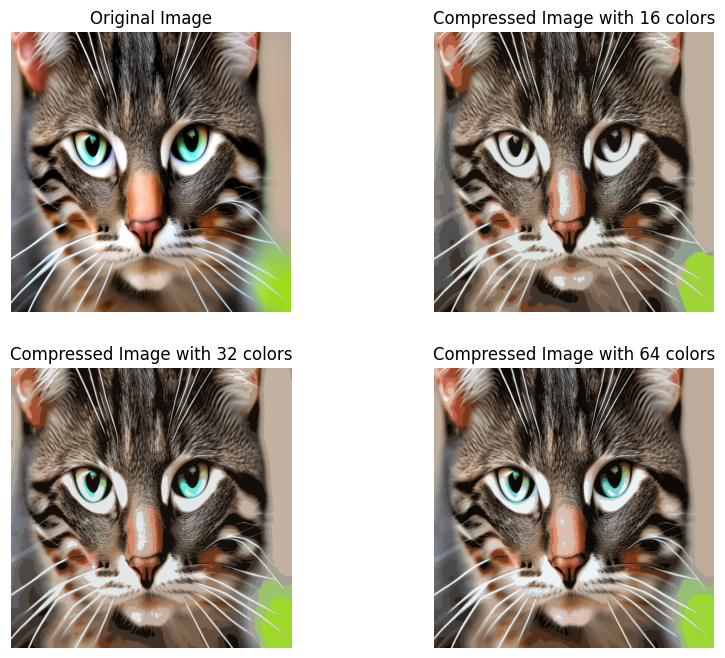

In [12]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

k_values = [16, 32, 64]
for i, k in enumerate(k_values):
    initial_centroids = pixels[np.random.choice(pixels.shape[0], k, replace=False)]
    centroids, clusters = kmeans(pixels, initial_centroids, k)
    compressed_pixels = centroids[clusters].astype(np.uint8)
    compressed_image = compressed_pixels.reshape(image_data.shape)

    plt.subplot(2, 2, i + 2)
    plt.title(f'Compressed Image with {k} colors')
    plt.imshow(compressed_image)
    plt.axis('off')

This script visually compares the original image with compressed versions, showing how k-means can be used for image compression by reducing the number of unique colors.

## Conclusion

K-Means clustering for image compression is useful in applications where a smaller file size is essential, and minor color variations can be sacrificed.